In [16]:
# Вариант 22

import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

from collections import Counter

1. Нарисовать граф цепи

In [17]:
data = pd.read_excel('.\data.xlsx',header = None)

data.head

<bound method NDFrame.head of       0     1     2     3     4
0  0.17  0.25  0.21  0.24  0.13
1  0.23  0.25  0.21  0.17  0.14
2  0.24  0.20  0.19  0.15  0.22
3  0.22  0.24  0.18  0.17  0.19
4  0.12  0.23  0.16  0.29  0.20>

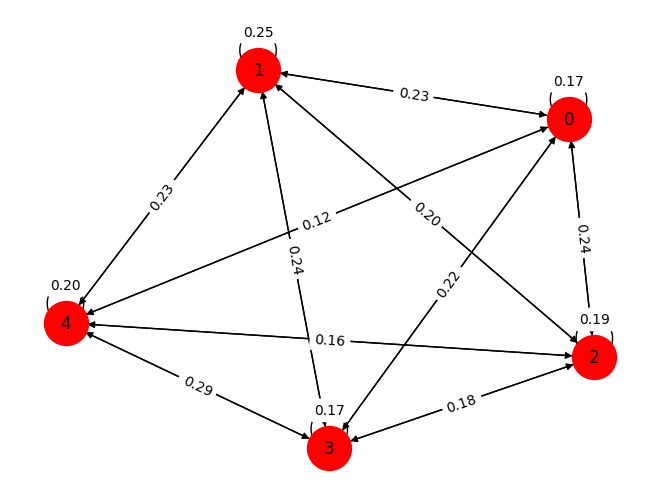

In [18]:
def draw_graph(matrix):
    G = nx.DiGraph()
    states = matrix.shape[0]
    for i in range(states):
        for j in range(states):
            if matrix[i, j] > 0:
                G.add_edge(i, j, weight=matrix[i, j])

    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True, node_size=1000, node_color='red')
    edge_labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels={(i, j): f'{weight:.2f}' for (i, j), weight in edge_labels.items()})
    plt.show()

draw_graph(data.values)

2. Проверить выполнение критерия эргодичности

In [19]:
def ergodic_check(matrix):
    states = matrix.shape[0]
    reachable = np.zeros((states, states), dtype=bool)

    for k in range(states):
        for i in range(states):
            for j in range(states):
                reachable[i, j] = reachable[i, j] or (matrix[i, k] and matrix[k, j])

    return np.all(reachable)

ergodic_check(data.values)

np.True_

3. Рассчитать предельные вероятности

In [20]:
def stationary_distribution(matrix):
    eigvals, eigvecs = np.linalg.eig(matrix.T)
    stationary = eigvecs[:, np.isclose(eigvals, 1)]
    stationary = stationary / stationary.sum()
    return stationary.real.flatten()

stationary_distribution(data.values)

array([0.19885538, 0.23494185, 0.19145238, 0.20094721, 0.17380319])

4. Записать предельную матрицу переходов

4. Записать предельную матрицу переходов

In [21]:
def limiting_matrix(stationary_dist):
    states = len(stationary_dist)
    return np.tile(stationary_dist, (states, 1))

limiting_matrix(stationary_distribution(data.values))

array([[0.19885538, 0.23494185, 0.19145238, 0.20094721, 0.17380319],
       [0.19885538, 0.23494185, 0.19145238, 0.20094721, 0.17380319],
       [0.19885538, 0.23494185, 0.19145238, 0.20094721, 0.17380319],
       [0.19885538, 0.23494185, 0.19145238, 0.20094721, 0.17380319],
       [0.19885538, 0.23494185, 0.19145238, 0.20094721, 0.17380319]])

5. Имитационное моделирование

* случайно выбрать начальное состояние;
* случайно разыграть переход в новое состояние, учитывая распределение вероятностей перехода;
* совершить 100 переходов;
* подсчитать число вхождений в каждое из состояний системы;

In [22]:
steps = 100

def simulate_chain(matrix, steps):
    num_states = matrix.shape[0]
    state = np.random.choice(num_states)
    states_visited = []

    for _ in range(steps):
        state = np.random.choice(num_states, p=matrix[state])
        states_visited.append(state)

    return states_visited


simulation_test = simulate_chain(data.values,steps)

Counter(simulation_test)

Counter({2: 23, 0: 23, 3: 22, 1: 20, 4: 12})

In [23]:
'''
states_visited = Counter(states_visited)

    for key in states_visited.keys():
        states_visited[key] /=steps
'''

'\nstates_visited = Counter(states_visited)\n\n    for key in states_visited.keys():\n        states_visited[key] /=steps\n'

* повторить эксперимент 50 раз;
* построить «графики» переключений состояний цепи (для наглядности соединяем дискретные точки) для 3 произвольных экспериментов;

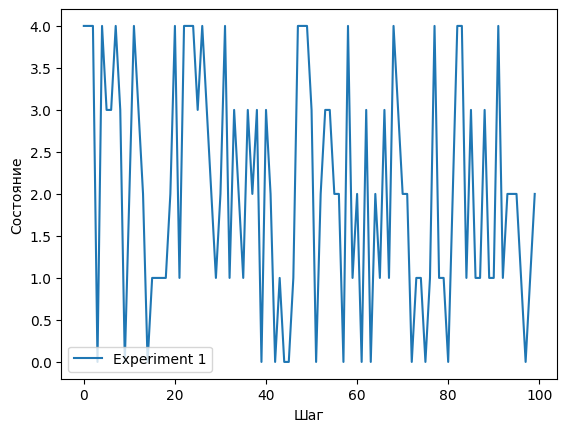

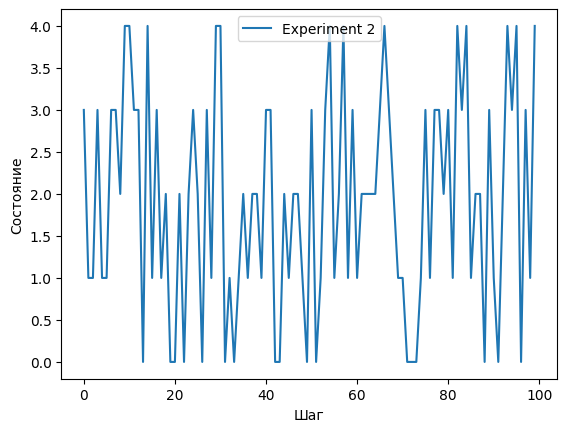

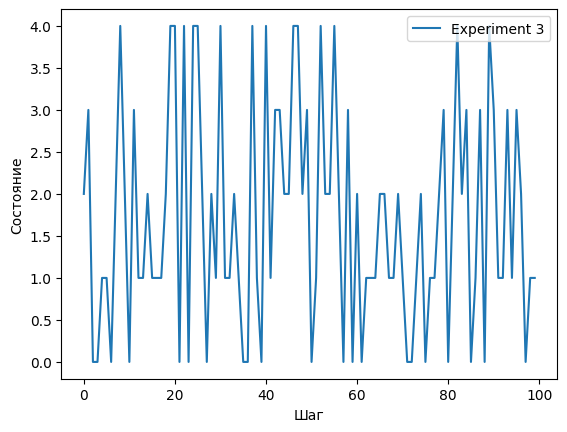

In [24]:
steps = 100
max_experiments = 50

experiments = [simulate_chain(data.values, steps) for _ in range(max_experiments)]

for i in range(3):
    plt.plot(experiments[i], label=f'Experiment {i+1}')
    plt.xlabel('Шаг')
    plt.ylabel('Состояние')
    plt.legend()
    plt.show()

In [25]:

num_states = data.shape[0]
# Двухмерный массив размером 50x5 для подсчета числа вхождений
state_counts = np.zeros((50, num_states), dtype=int)

for experiment_number, experiment_values in enumerate(experiments):
    for state_value in experiment_values:
        # Считаем число вхождений для конкретного эксперимента
        state_counts[experiment_number, state_value] += 1

# Делим абсолютные числа вхождений на общее число шагов в эксперименте 
# получаем матрицу 50x5 c относительными частотами для каждого состояния в каждом эксперименте

relative_frequencies = state_counts / steps

# Берем средние значения по столбцам и получаем относительные обобщенные частоты для всех экспериментов  
average_relative_frequencies = relative_frequencies.mean(axis=0)

# Рассчитывам среднеквадратичные отклонения
corrected_std_deviations = relative_frequencies.std(axis=0, ddof=1)

print("Average Relative Frequencies:\n", average_relative_frequencies)
print("Corrected Standard Deviations:\n", corrected_std_deviations)

# Стационарные распределения полученные аналитическим путем
print ("True values:\n", stationary_distribution(data.values))

Average Relative Frequencies:
 [0.1928 0.239  0.1912 0.203  0.174 ]
Corrected Standard Deviations:
 [0.03368764 0.03918819 0.03957117 0.04291663 0.04025429]
True values:
 [0.19885538 0.23494185 0.19145238 0.20094721 0.17380319]
